# Overview
Building upon the success of our previous projects—where we analyzed bike rental data, forecasted demand using machine learning, and classified vehicles using CNNs—this next phase focuses on analyzing customer review data. The objective is to analyze customer reviews, extract insights, and understand sentiment to improve BikeEase’s services.

BikeEase receives thousands of customer reviews and feedback across multiple platforms. However, manually analyzing this data is inefficient. The goal of this capstone is to develop an NLP-powered sentiment analysis system that automatically classifies reviews as positive, neutral, or negative. Additionally, we will perform topic modeling to uncover key themes in customer feedback.

# Project Statement

Develop an end-to-end NLP pipeline to analyze customer reviews for sentiment classification and key topic extraction. This system will help BikeEase identify customer pain points and areas of improvement.

Input dataset: DatasetLinks to an external site.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, LSTM
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

2025-05-05 20:30:06.262516: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-05 20:30:06.272375: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746495006.284292    2329 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746495006.287292    2329 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746495006.296587    2329 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

## Steps to Perform
### Task 1: Data Collection & preprocessing

In [2]:
df = pd.read_csv('bike_rental_reviews.csv')

In [3]:
df.head()

,review_text,sentiment
0,"The entire process was easy, and the availabil...",positive
1,Standard rental process. The mobile app was ac...,neutral
2,One of the best bike rentals I’ve had. The mob...,positive
3,One of the best bike rentals I’ve had. The cus...,positive
4,Not worth the money. The seat comfort was a ma...,negative


In [4]:
df.duplicated().sum()

49700

In [5]:
# df.drop_duplicates(inplace=True)

sentiment
negative    16840
positive    16777
neutral     16383
Name: count, dtype: int64

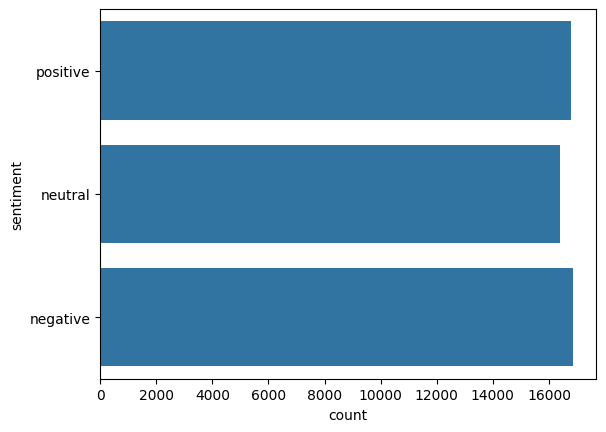

In [6]:
sns.countplot(df['sentiment'])
df['sentiment'].value_counts()

In [7]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/cullen-
[nltk_data]     fedora/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/cullen-
[nltk_data]     fedora/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/cullen-
[nltk_data]     fedora/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Collect and clean customer reviews from a given dataset (or scrape data if available)

#### Perform text cleaning (lowercasing, removing punctuation, stopword removal, lemmatization)

#### Tokenize and vectorize the text if required

In [8]:
def clean_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
    
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

In [9]:
df['cleaned'] = df['review_text'].apply(clean_text)

In [10]:
df['cleaned'].head()

0    entire process easy , availability high quality .
1    Standard rental process . mobile app acceptable .
2    One best bike rental ’ . mobile app made even ...
3    One best bike rental ’ . customer service made...
4           worth money . seat comfort major letdown .
Name: cleaned, dtype: object

In [11]:
# Tokenize the cleaned text
df['tokenized'] = df['cleaned'].apply(lambda x: x.split())

In [12]:
df['tokenized'].head()

0    [entire, process, easy, ,, availability, high,...
1    [Standard, rental, process, ., mobile, app, ac...
2    [One, best, bike, rental, ’, ., mobile, app, m...
3    [One, best, bike, rental, ’, ., customer, serv...
4    [worth, money, ., seat, comfort, major, letdow...
Name: tokenized, dtype: object

In [13]:
# model = Word2Vec(sentences=df['tokenized'], vector_size=100, window=5, min_count=1)

In [14]:
# # Get vector for a specific word
# word_vector = model.wv['entire']
# print("Vector for 'entire':\n", word_vector)

In [15]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned'])

### Task 2: Sentiment analysis
#### Build a sentiment classification model (positive, neutral, negative) using:


In [16]:
y = df['sentiment']

In [17]:
le = LabelEncoder()
y = le.fit_transform(y)

In [18]:
print(y)

[2 1 2 ... 2 0 0]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Traditional models: Logistic Regression, Naïve Bayes

In [20]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = log_model.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3325
           1       1.00      1.00      1.00      3317
           2       1.00      1.00      1.00      3358

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [23]:
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)
y_pred_NB = NB_model.predict(X_test)
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3325
           1       1.00      1.00      1.00      3317
           2       1.00      1.00      1.00      3358

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



#### Deep learning models: LSTMs, Transformers (BERT)


In [24]:
tokenizer = Tokenizer(num_words=1000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['cleaned'])

In [25]:
sequences = tokenizer.texts_to_sequences(df['cleaned'])

In [26]:
X_padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

In [27]:
vocab_size = 1000
Embedding_dim = 64
max_length = 200

In [29]:
LSTM_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=Embedding_dim, input_length=max_length),
    LSTM(128),
    Dense(3, activation='softmax')
])

LSTM_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = LSTM_model.fit(X_padded, y, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10


/var/data/python/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.3355 - loss: 1.0989 - val_accuracy: 0.3299 - val_loss: 1.0988
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.3360 - loss: 1.0987 - val_accuracy: 0.3299 - val_loss: 1.0988
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.3391 - loss: 1.0986 - val_accuracy: 0.3299 - val_loss: 1.0985
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.3374 - loss: 1.0986 - val_accuracy: 0.3299 - val_loss: 1.0991
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.3365 - loss: 1.0987 - val_accuracy: 0.3299 - val_loss: 1.0989
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.3393 - loss: 1.0986 - val_accuracy: 0.3299 - val_loss: 1.0989
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.3354 - loss: 1.0987 - val_accuracy: 0.3299 - val_loss: 1.0985
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.3347 - loss: 1.0985 - val_accurac

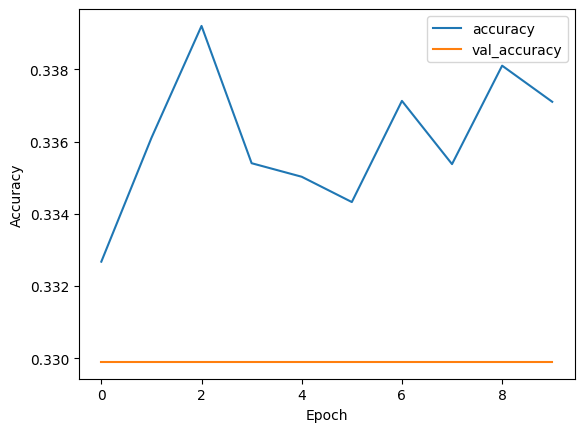

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Evaluate models using accuracy, F1-score, and confusion matrix

In [32]:
y_pred_LSTM = LSTM_model.predict(X_padded)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step
